In [7]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

In [8]:
states = pd.read_csv(r"C:\Users\synwi\states_all.csv")

In [51]:
#Soru1
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (8,5.5)

In [62]:
#Soru1
#null veriler kutu grafiğinde sorun yarattığı için interpole yöntemi ile null değerleri doldurduk.
df1 = states.interpolate()

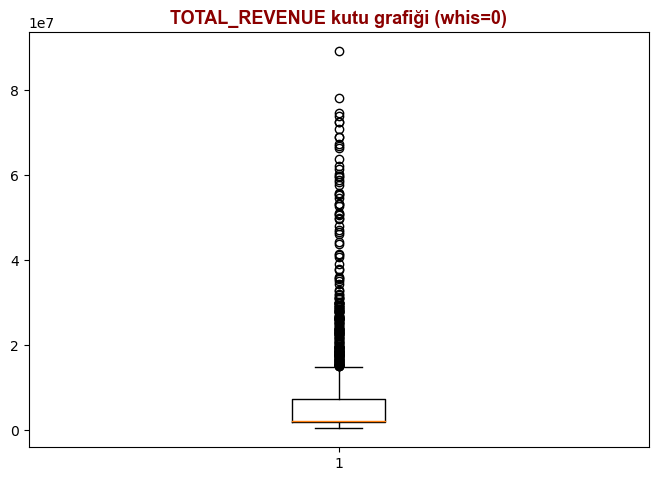

In [63]:
#Soru1
baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
eksen_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }
#states.columns = ['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE', 'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE', 'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE']

plt.boxplot(df1["TOTAL_REVENUE"])
plt.title("TOTAL_REVENUE kutu grafiği (whis=0)", fontdict=baslik_font)
plt.show()

In [54]:
#Soru1
#6.3*10^7 ve üzeri değerleri aşırı değer olarak değerlendirebiliriz.

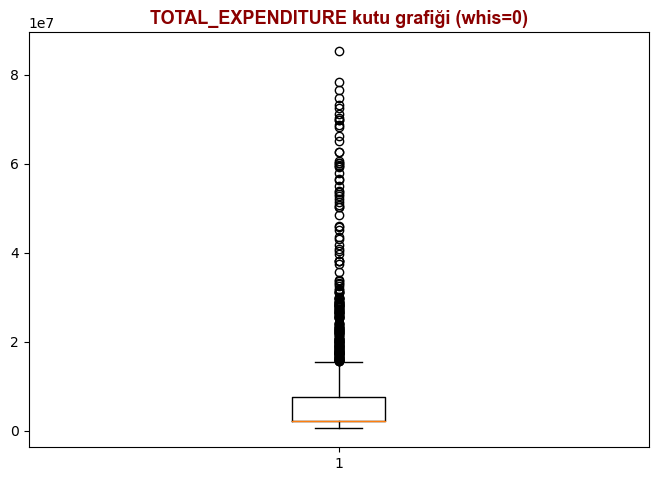

In [64]:
plt.boxplot(df1["TOTAL_EXPENDITURE"])
plt.title("TOTAL_EXPENDITURE kutu grafiği (whis=0)", fontdict=baslik_font)
plt.show()

In [58]:
#Soru1
#6.7*10^7 ve üzeri değerleri aşırı değer olarak değerlendirebiliriz.

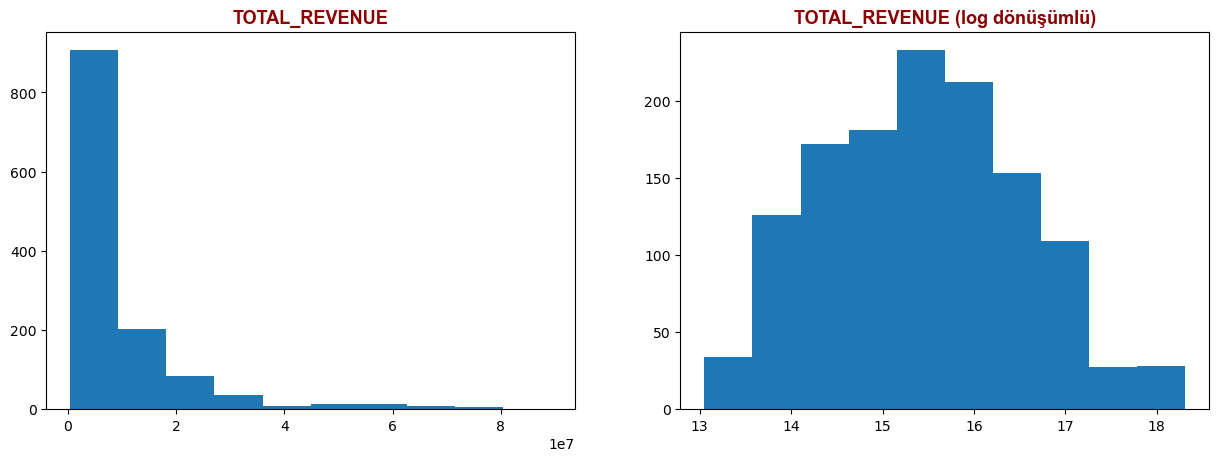

In [70]:
#Soru2
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.hist(states["TOTAL_REVENUE"])
plt.title("TOTAL_REVENUE", fontdict=baslik_font)

plt.subplot(1,2,2)
plt.hist(np.log(states["TOTAL_REVENUE"]))
plt.title("TOTAL_REVENUE (log dönüşümlü)", fontdict=baslik_font)
plt.show()

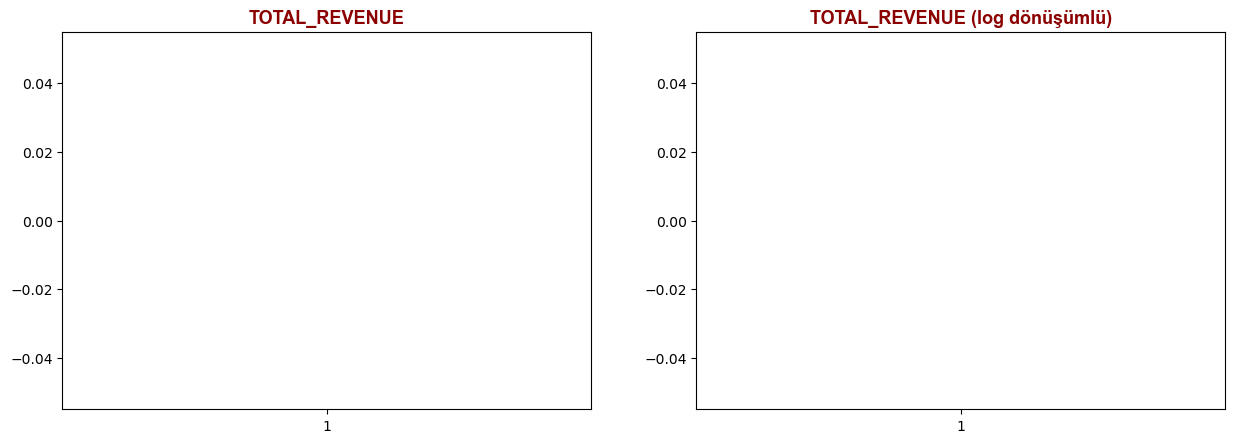

In [72]:
#Soru2
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.boxplot(states["TOTAL_REVENUE"])
plt.title("TOTAL_REVENUE", fontdict=baslik_font)

plt.subplot(1,2,2)
plt.boxplot(np.log(states["TOTAL_REVENUE"]))
plt.title("TOTAL_REVENUE (log dönüşümlü)", fontdict=baslik_font)
plt.show()


In [116]:
#Soru2
from scipy.stats.mstats import winsorize

winsorize_R1 = winsorize(df1["TOTAL_REVENUE"], (0, 0.10))
winsorize_E1 = winsorize(df1["TOTAL_EXPENDITURE"], (0, 0.10))

winsorize_R1
winsorize_E1

masked_array(data=[2653798.,  972488., 3401580., ..., 2034229., 2034229.,
                   2034229.],
             mask=False,
       fill_value=1e+20)

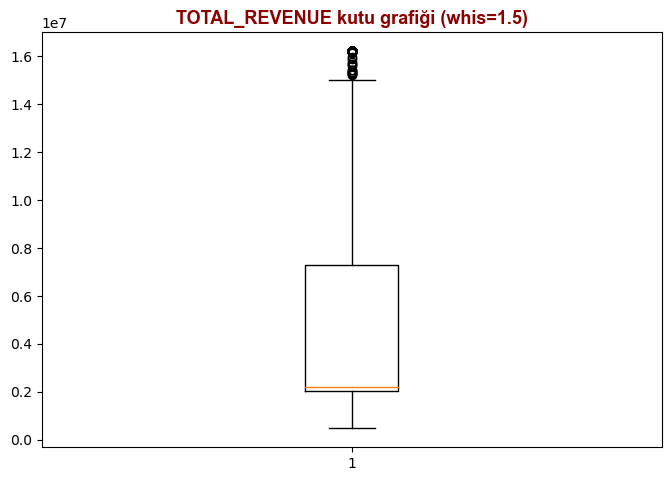

In [113]:
#Soru2
plt.boxplot(winsorize_R1)
plt.title("TOTAL_REVENUE kutu grafiği (whis=1.5)", fontdict=baslik_font)
plt.show()

In [96]:
#Soru3

In [120]:
#Soru3
df1['fark'] = df1['TOTAL_REVENUE'] - df1['TOTAL_EXPENDITURE']

In [121]:
#Soru3
df1['fark']

0        25087.0
1        77103.0
2      -143501.0
3       -31063.0
4      -878807.0
          ...   
1913     10440.0
1914     10440.0
1915     10440.0
1916     10440.0
1917     10440.0
Name: fark, Length: 1918, dtype: float64

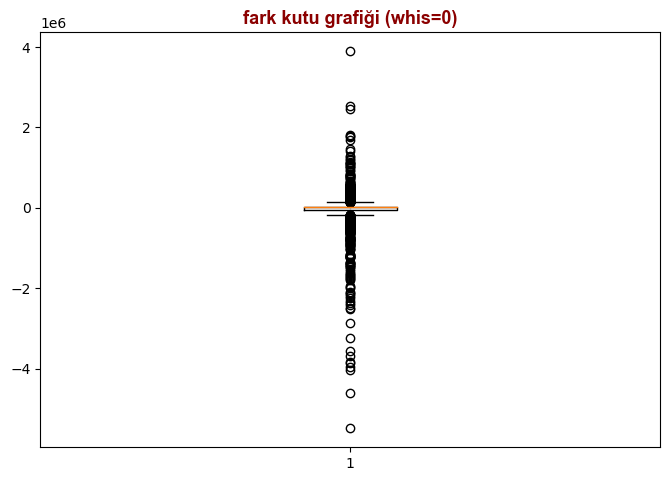

In [122]:
#Soru3
plt.boxplot(df1["fark"])
plt.title("fark kutu grafiği (whis=0)", fontdict=baslik_font)
plt.show()

In [123]:
#Soru3
#2*10^6 ve üstü değerler ile 2.4*10^6 ve altı değerleri aykırı değer olarak nitelendirebiliriz.

In [124]:
#Soru3
from scipy.stats.mstats import winsorize

winsorize_goruntulenme = winsorize(df1["fark"], (0, 0.10))

winsorize_goruntulenme

masked_array(data=[  25087.,   77103., -143501., ...,   10440.,   10440.,
                     10440.],
             mask=False,
       fill_value=1e+20)

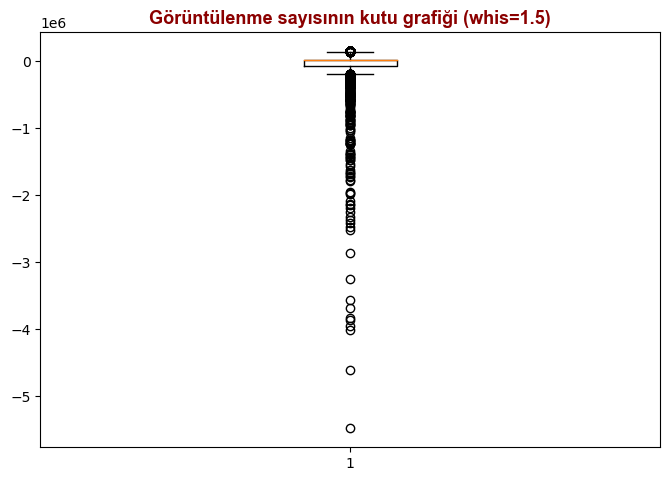

In [125]:
#Soru3
plt.boxplot(winsorize_goruntulenme)
plt.title("Görüntülenme sayısının kutu grafiği (whis=1.5)", fontdict=baslik_font)
plt.show()

In [126]:
#Soru3
from scipy.stats.mstats import winsorize

winsorize_goruntulenme1 = winsorize(df1["TOTAL_REVENUE"], (0, 0.10))

winsorize_goruntulenme1

masked_array(data=[2678885., 1049591., 3258079., ..., 2044669., 2044669.,
                   2044669.],
             mask=False,
       fill_value=1e+20)

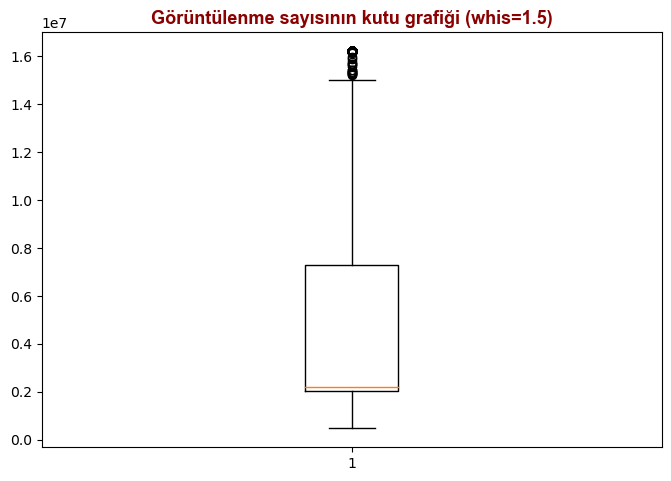

In [127]:
plt.boxplot(winsorize_goruntulenme1)
plt.title("Görüntülenme sayısının kutu grafiği (whis=1.5)", fontdict=baslik_font)
plt.show()

In [128]:
#Soru 4
winsorize_R1
winsorize_E1
df1['fark2'] = winsorize_R1 - winsorize_E1

In [129]:
df1['fark2']

0        25087.0
1        77103.0
2      -143501.0
3       -31063.0
4         7065.0
          ...   
1913     10440.0
1914     10440.0
1915     10440.0
1916     10440.0
1917     10440.0
Name: fark2, Length: 1918, dtype: float64

In [132]:
#Soru3
from scipy.stats.mstats import winsorize

winsorize_fark2 = winsorize(df1["fark2"], (0, 0.10))

winsorize_fark2

masked_array(data=[  25087.,   77103., -143501., ...,   10440.,   10440.,
                     10440.],
             mask=False,
       fill_value=1e+20)

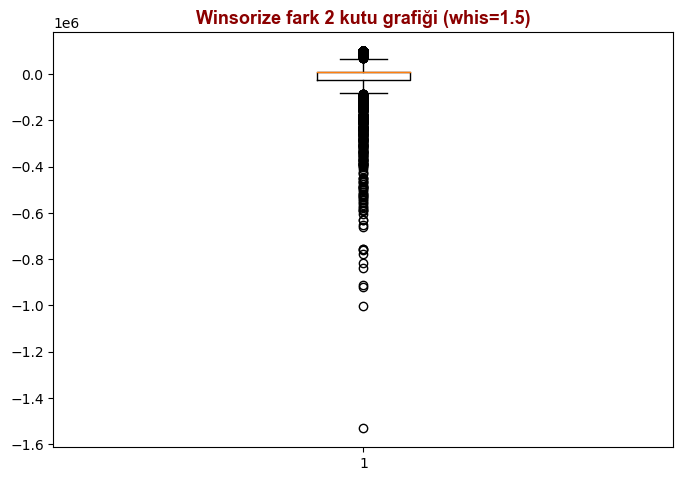

In [133]:
plt.boxplot(winsorize_fark2)
plt.title("Winsorize fark 2 kutu grafiği (whis=1.5)", fontdict=baslik_font)
plt.show()

In [134]:
#Soru5
#Aykırı değerleri temizledikten sonra bütçe açığı hesaplamak değerler genel olarak daha toplu durmakta ve aykırı değerlere
#daha az rastlamaktayız.

In [ ]:
#Soru6
#Aykırı değerlerin az olması ve daha derli değerler elde etmemiz sebebiyle ikinci durum, yani aykırı değerleri temizledikten
#sonra bütçe açığını hesaplamak daha iyi bir sonuç elde etmemizi sağlamakta.